In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
DeliveryTime=pd.read_csv("C:\\Users\\Admin\\Downloads\\delivery_time.csv")
DeliveryTime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [38]:
DeliveryTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [39]:
DeliveryTime = DeliveryTime.rename({'Sorting Time': 'ST','Delivery Time':'DT'}, axis=1)
DeliveryTime

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='ST', ylabel='DT'>

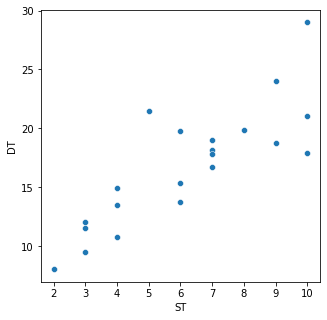

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='ST',y='DT', data = DeliveryTime,palette = 'Set1')

In [41]:
DeliveryTime = DeliveryTime.rename({'Sorting Time': 'Sorting','Delivery Time':'Delivery'}, axis=1)
DeliveryTime

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [42]:
data1=DeliveryTime.copy()

In [43]:
DeliveryTime.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:xlabel='ST', ylabel='Density'>

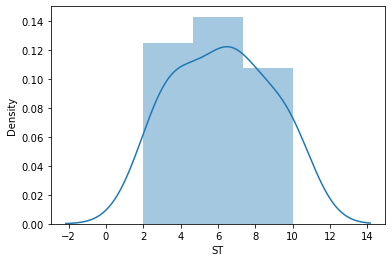

In [45]:
import seaborn as sns
sns.distplot(DeliveryTime['ST'])

<AxesSubplot:xlabel='DT', ylabel='Density'>

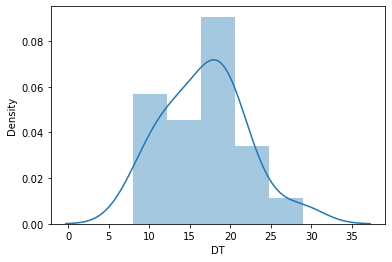

In [46]:
sns.distplot(DeliveryTime['DT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff04816280>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff048169a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff0480aeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff04820100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff04820490>],
 'means': []}

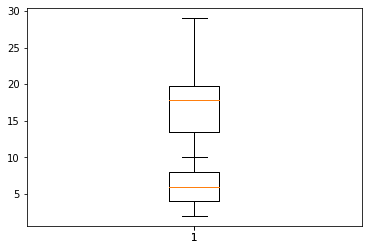

In [48]:
plt.boxplot(DeliveryTime['ST'])
plt.boxplot(DeliveryTime['DT'])

In [49]:
import statsmodels.formula.api as smf

In [50]:
model=smf.ols("DT~ST", data=DeliveryTime).fit()

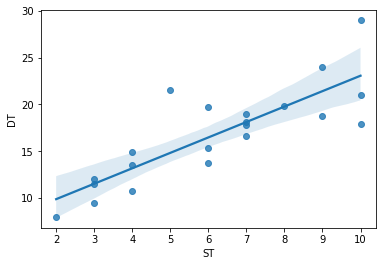

In [51]:
sns.regplot(x="ST",y="DT",data = DeliveryTime);

In [52]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

For every unit increase in the SoritngTime value, the value for De will increase Delivery time by
1.649020

In [17]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [24]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [18]:
model.rsquared

0.6822714748417231

In [19]:
model.pvalues

Intercept    0.001147
Sorting      0.000004
dtype: float64

'''Since p-value is less then 0.05 for 'Sorcing Time' variable, 
we can say that it is a significant variable in predicting the dependent variable 'Delivery Time' ''

In [20]:
DeliveryTime['Predicted Value']=model.fittedvalues

In [21]:
DeliveryTime

,Delivery,Sorting,Predicted Value
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [54]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [55]:
DeliveryTime['Error']=model.resid

In [23]:
model.rsquared

0.6822714748417231

In [24]:
model.pvalues

Intercept    0.001147
Sorting      0.000004
dtype: float64

In [56]:
DeliveryTime['Error_Sq']=(DeliveryTime['Error'])**2
DeliveryTime

,DT,ST,Error,Error_Sq
0,21.00,10,-2.072933,4.297051
1,13.50,4,0.321186,0.103161
2,19.75,6,3.273147,10.713489
3,24.00,9,2.576087,6.636224
4,29.00,10,5.927067,35.130124
5,15.35,6,-1.126853,1.269798
6,19.00,7,0.874127,0.764098
7,9.50,3,-2.029794,4.120062
8,17.90,10,-5.172933,26.759235
9,18.75,9,-2.673913,7.149811


In [57]:
Mean_Squared_Error=DeliveryTime['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584063

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        17:56:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
data_log=data1
data_log.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [74]:
import numpy as np
data_log=np.log(data1)
data_log.head()

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<AxesSubplot:xlabel='ST', ylabel='Density'>

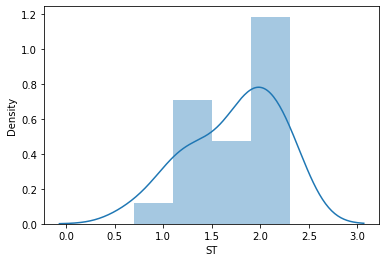

In [105]:
sns.distplot(data_log['ST'])

<AxesSubplot:xlabel='DT', ylabel='Density'>

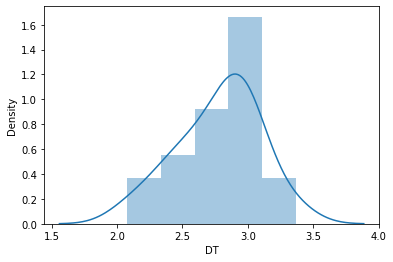

In [106]:
sns.distplot(data_log['DT'])

In [82]:
data_log.corr()

,DT,ST
DT,1.000000,0.878727
ST,0.878727,1.000000


In [77]:
model_2=smf.ols("DT~ST", data=data_log).fit()

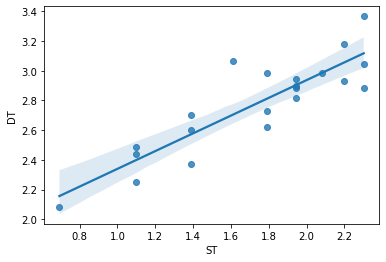

In [84]:
sns.regplot(x="ST",y="DT",data = data_log);

In [80]:
model_2.pvalues

Intercept    5.921137e-11
ST           1.601539e-07
dtype: float64

In [81]:
model_2.params

Intercept    1.741987
ST           0.597522
dtype: float64

In [83]:
model_2.rsquared

0.77216134926874

In [91]:
model_2.fittedvalues

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [93]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.60e-07
Time:                        18:12:52   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
ST             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
data_log['Predicted Value']=model.fittedvalues
data_log['Error']=model.resid
data_log

,DT,ST,Predicted Value,Error
0,3.044522,2.302585,23.072933,-2.072933
1,2.602690,1.386294,13.178814,0.321186
2,2.983153,1.791759,16.476853,3.273147
3,3.178054,2.197225,21.423913,2.576087
4,3.367296,2.302585,23.072933,5.927067
5,2.731115,1.791759,16.476853,-1.126853
6,2.944439,1.945910,18.125873,0.874127
7,2.251292,1.098612,11.529794,-2.029794
8,2.884801,2.302585,23.072933,-5.172933
9,2.931194,2.197225,21.423913,-2.673913


In [95]:
data_log['Error_Sq']=(data_log['Error'])**2
data_log

,DT,ST,Predicted Value,Error,Error_Sq
0,3.044522,2.302585,23.072933,-2.072933,4.297051
1,2.602690,1.386294,13.178814,0.321186,0.103161
2,2.983153,1.791759,16.476853,3.273147,10.713489
3,3.178054,2.197225,21.423913,2.576087,6.636224
4,3.367296,2.302585,23.072933,5.927067,35.130124
5,2.731115,1.791759,16.476853,-1.126853,1.269798
6,2.944439,1.945910,18.125873,0.874127,0.764098
7,2.251292,1.098612,11.529794,-2.029794,4.120062
8,2.884801,2.302585,23.072933,-5.172933,26.759235
9,2.931194,2.197225,21.423913,-2.673913,7.149811


In [99]:
Mean_Squared_Error=data_log['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584063

In [108]:
data_sqrt=data1
data_sqrt.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [109]:
data_sqrt=np.sqrt(data_sqrt)
data_sqrt.head()

,DT,ST
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278


<AxesSubplot:xlabel='DT', ylabel='Density'>

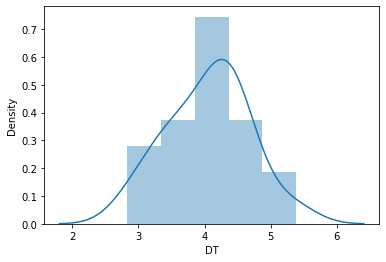

In [112]:
sns.distplot(data_sqrt['DT'])

<AxesSubplot:xlabel='ST', ylabel='Density'>

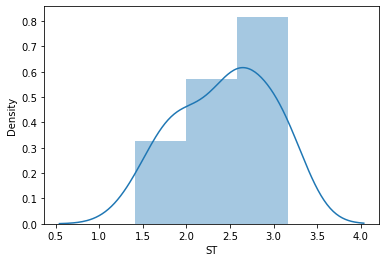

In [113]:
sns.distplot(data_sqrt['ST'])

In [114]:
data_sqrt.corr()

,DT,ST
DT,1.000000,0.853933
ST,0.853933,1.000000


In [116]:
model_3=smf.ols("DT~ST",data=data_sqrt).fit()

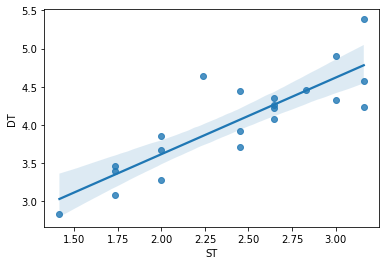

In [117]:
sns.regplot(x="ST",y="DT",data = data_sqrt);

In [119]:
model_3.rsquared

0.7292011987544664

In [120]:
model_3.pvalues

Intercept    1.833621e-04
ST           8.475706e-07
dtype: float64

In [122]:
model_3.params

Intercept    1.613479
ST           1.002217
dtype: float64

In [123]:
model_3.fittedvalues

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

In [124]:
model_3.resid

0    -0.200191
1     0.056322
2     0.375699
3     0.278850
4     0.602398
5    -0.150491
6     0.093804
7    -0.267162
8    -0.551928
9    -0.290002
10    0.004913
11   -0.339193
12   -0.180980
13    0.041796
14    0.119060
15    0.239548
16   -0.360299
17   -0.009511
18   -0.202400
19   -0.042537
20    0.782305
dtype: float64

In [126]:
data_sqrt['Predicted Value']=model.fittedvalues
data_sqrt['Error']=model.resid
data_sqrt

,DT,ST,Predicted Value,Error
0,4.582576,3.162278,23.072933,-2.072933
1,3.674235,2.000000,13.178814,0.321186
2,4.444097,2.449490,16.476853,3.273147
3,4.898979,3.000000,21.423913,2.576087
4,5.385165,3.162278,23.072933,5.927067
5,3.917908,2.449490,16.476853,-1.126853
6,4.358899,2.645751,18.125873,0.874127
7,3.082207,1.732051,11.529794,-2.029794
8,4.230839,3.162278,23.072933,-5.172933
9,4.330127,3.000000,21.423913,-2.673913


In [128]:
data_sqrt['Error_Sq']=(data_sqrt['Error'])**2
data_sqrt

,DT,ST,Predicted Value,Error,Error_Sq
0,4.582576,3.162278,23.072933,-2.072933,4.297051
1,3.674235,2.000000,13.178814,0.321186,0.103161
2,4.444097,2.449490,16.476853,3.273147,10.713489
3,4.898979,3.000000,21.423913,2.576087,6.636224
4,5.385165,3.162278,23.072933,5.927067,35.130124
5,3.917908,2.449490,16.476853,-1.126853,1.269798
6,4.358899,2.645751,18.125873,0.874127,0.764098
7,3.082207,1.732051,11.529794,-2.029794,4.120062
8,4.230839,3.162278,23.072933,-5.172933,26.759235
9,4.330127,3.000000,21.423913,-2.673913,7.149811


In [131]:
Mean_Squared_Error=data_sqrt['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584063

In [132]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.48e-07
Time:                        18:37:26   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
ST             1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
data_square=data1
data_square=np.square(data1)
data_square.head()

,DT,ST
0,441.0000,100
1,182.2500,16
2,390.0625,36
3,576.0000,81
4,841.0000,100


<AxesSubplot:xlabel='DT', ylabel='Density'>

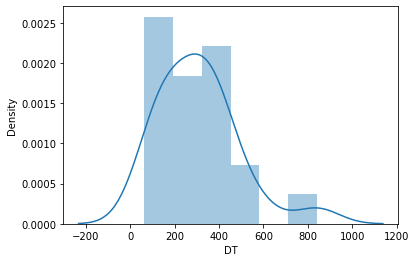

In [138]:
sns.distplot(data_square['DT'])

<AxesSubplot:xlabel='ST', ylabel='Density'>

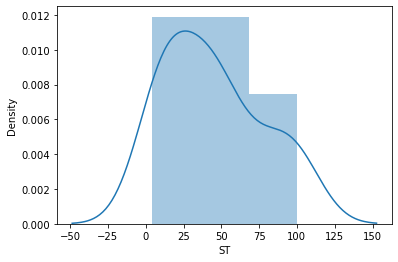

In [139]:
sns.distplot(data_square['ST'])

In [142]:
data_square.corr()

,DT,ST
DT,1.000000,0.766934
ST,0.766934,1.000000


In [148]:
model_4=smf.ols("DT~ST",data=data_square).fit()

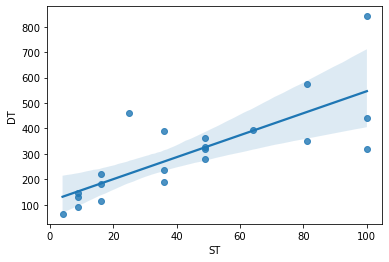

In [149]:
sns.regplot(x="ST",y="DT",data = data_square);

In [150]:
model_4.pvalues

Intercept    0.020675
ST           0.000050
dtype: float64

In [151]:
model_4.params

Intercept    114.154847
ST             4.323874
dtype: float64

In [152]:
model_4.rsquared

0.5881883446986836

In [153]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           4.99e-05
Time:                        18:43:35   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1548     45.231      2.524      0.021      19.485     208.825
ST             4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""